In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
from gameanalysis import rsgame, paygame, nash, learning
import numpy as np
import time
import matplotlib.pyplot as plt
import colabutils
import environment.wrapper as wrapper
import tqdm
import experiment

In [3]:
np.set_printoptions(precision=2, suppress=True)

## Experiment

In [92]:
from environment.colabenv import ColabSim
from environment.colabagent import ColabAgent

In [103]:
players = [1,1]
strategies = [8,8]
g = rsgame.empty(players, strategies)
profiles = g.all_profiles()

In [104]:
payoffs = []
for p in profiles:
    payoffs.append( -colabutils.estimate_payoff(p, n=1) )
payoffs = np.array(payoffs)

In [105]:
pg = paygame.game(players, strategies, profiles, payoffs)

In [111]:
nash.replicator_dynamics(pg, prof=pg.random_mixture())

array([0.  , 0.  , 0.  , 0.43, 0.  , 0.  , 0.  , 0.57, 0.  , 0.  , 0.51,
       0.  , 0.  , 0.  , 0.49, 0.  ])

## Draw payoff table

In [107]:
S = 8
table = np.zeros((8,8))
for i, p in enumerate(profiles):
    num1 = np.where(p[:S]==1)[0][0]
    num2 = np.where(p[S:]==1)[0][0]
    table[num1, num2] = payoffs[i].min()

In [108]:
print(table)

[[-559.55 -510.63 -464.15 -467.71 -559.55 -510.63 -464.15 -467.71]
 [-417.85 -533.38 -460.9  -517.7  -417.85 -535.65 -460.9  -521.7 ]
 [-556.21 -479.6  -714.76 -426.01 -556.21 -479.6  -714.76 -426.01]
 [-413.66 -625.27 -397.43 -887.25 -413.66 -632.93 -397.43 -887.25]
 [-559.55 -510.63 -464.15 -467.71 -559.55 -510.63 -464.15 -467.71]
 [-417.85 -534.21 -460.9  -516.75 -417.85 -534.37 -460.9  -510.31]
 [-556.21 -479.6  -714.76 -426.01 -556.21 -479.6  -714.76 -426.01]
 [-413.66 -630.26 -397.43 -886.63 -413.66 -624.51 -397.43 -855.58]]


In [109]:
%matplotlib notebook

<IPython.core.display.Javascript object>


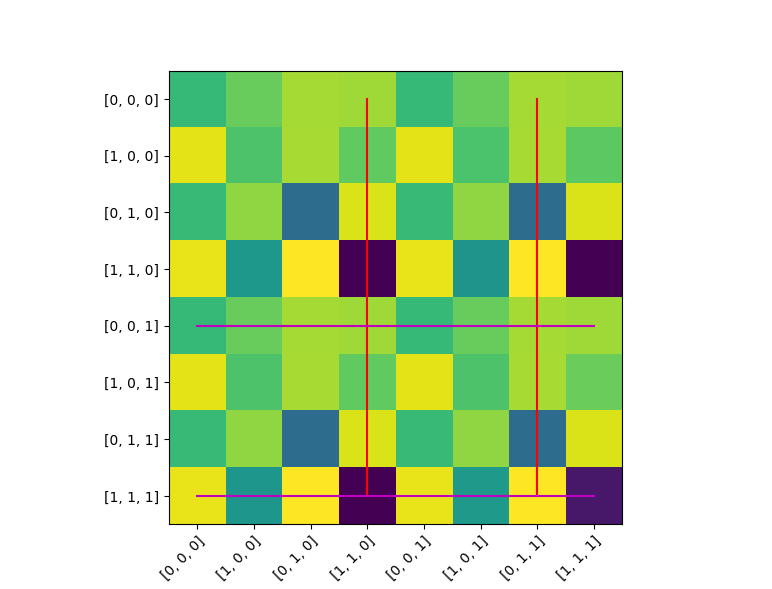

In [119]:
labels = [str(colabutils.number_to_strat(i)) for i in range(8)]
fig, ax = plt.subplots()
im = ax.imshow(table)

# We want to show all ticks...
ax.set_xticks(np.arange(S))
ax.set_yticks(np.arange(S))
# ... and label them with the respective list entries
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
# Rotate the tick labels and set their alignment.
_ = plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Plot NE
plt.plot([3, 3], [0,7], 'r')
plt.plot([6, 6], [0,7], 'r')
plt.plot([0,7],[4,4],'m')
plt.plot([0,7], [7,7], 'm')